In [81]:
import pandas as pd                  #for dealing with dataframs
import numpy as np                   #for scientific compution and arraies
import matplotlib.pyplot as plt      #fro visualization
import seaborn as sns                #fro better visualization
%matplotlib inline

In [82]:
address=r"C:\Users\Admin\realtime_data_set.csv"
df=pd.read_csv(address,parse_dates=True,encoding='latin1') #here i am using encoding attribute
df.head()

,PatientId,Age,Patient Gender,Patient Location (District),Symptoms,Pre-existing conditions,Scheduled Date
0,2.990000e+13,46,FEMALE,Mumbai,fever,diabetes,14/03/2021
1,5.590000e+14,26,MALE,Thane,cold,diabetes,14/03/2021
2,4.260000e+12,32,FEMALE,Mumbai,fever,none,15/03/2021
3,8.680000e+11,45,MALE,Raigad,cough,hypertension,14/02/2021
4,8.840000e+12,20,FEMALE,Thane,cold,hypotension,24/03/2021


In [31]:
df.shape


(106, 6)

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 46 to 43
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PatientId                    106 non-null    float64
 1   Patient Gender               106 non-null    object 
 2   Patient Location (District)  106 non-null    object 
 3   Symptoms                     106 non-null    object 
 4   Pre-existing conditions      106 non-null    object 
 5   Scheduled Date               106 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.8+ KB


In [33]:
df.duplicated().sum()


0

In [34]:
df.isnull().sum()


PatientId                      0
Patient Gender                 0
Patient Location (District)    0
Symptoms                       0
Pre-existing conditions        0
Scheduled Date                 0
dtype: int64

In [35]:
df.describe()  

,PatientId
count,1.060000e+02
mean,1.407432e+14
std,2.560246e+14
min,2.578785e+10
25%,3.587500e+12
50%,1.595000e+13
75%,9.505000e+13
max,9.970000e+14


In [36]:
df.nunique()

PatientId                      105
Patient Gender                   5
Patient Location (District)      5
Symptoms                         4
Pre-existing conditions          5
Scheduled Date                   8
dtype: int64

In [72]:
# Rename incorrect columns names
df = df.rename(columns={'male':'MALE', 'female':'FEMALE'})
df.columns

Index(['PatientId', 'Age', 'Patient Gender', 'Patient Location (District)',
       'Symptoms', 'Pre-existing conditions', 'Scheduled Date'],
      dtype='object')

In [38]:
df['Patient Gender'].value_counts()

MALE                52
FEMALE              51
female               1
male                 1
VARCHAR NOT NULL     1
Name: Patient Gender, dtype: int64

In [39]:
df['Patient Location (District)'].value_counts()

Mumbai               35
navi mumbai          30
Thane                24
Raigad               16
 VARCHAR NOT NULL     1
Name: Patient Location (District), dtype: int64

In [40]:
df['Pre-existing conditions'].value_counts()

none                27
hypertension        26
hypotension         26
diabetes            26
VARCHAR NOT NULL     1
Name: Pre-existing conditions, dtype: int64

In [41]:
df['Scheduled Date'].value_counts()

16/07/2021      15
14/03/2021      15
15/03/2021      15
24/04/2021      15
14/02/2021      15
24/03/2021      15
4/3/2021        15
INT NOT NULL     1
Name: Scheduled Date, dtype: int64

In [83]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

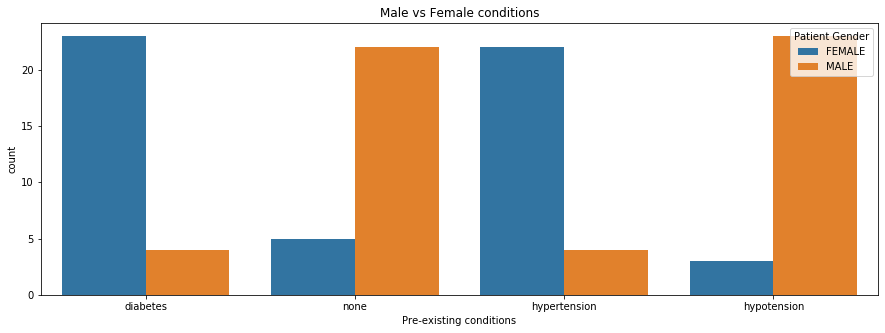

In [84]:
sns.countplot(x=df['Pre-existing conditions'], hue=df['Patient Gender']);
plt.title('Male vs Female conditions');

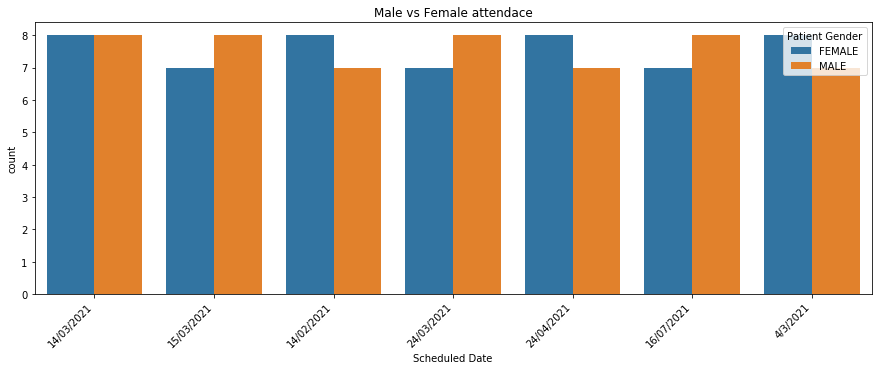

In [85]:
plt.xticks(rotation=45,ha='right')
sns.countplot(x=df['Scheduled Date'], hue=df['Patient Gender']);
plt.title('Male vs Female attendace');

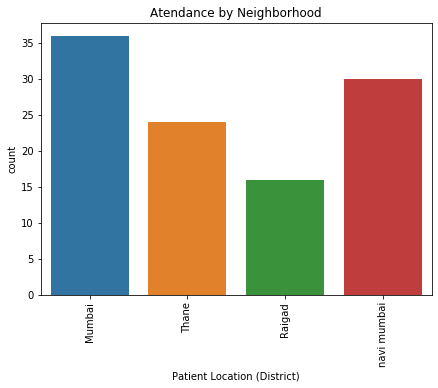

In [86]:
#location relation
plt.figure(figsize=(7,5))
sns.countplot(x=df['Patient Location (District)']);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90);

In [89]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

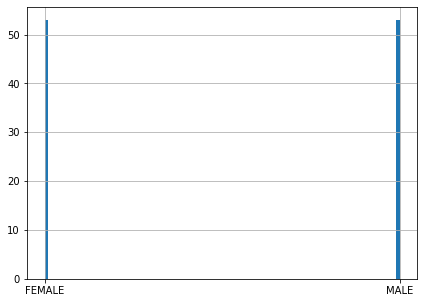

In [90]:
#age relation
df['Patient Gender'].hist(bins=100);

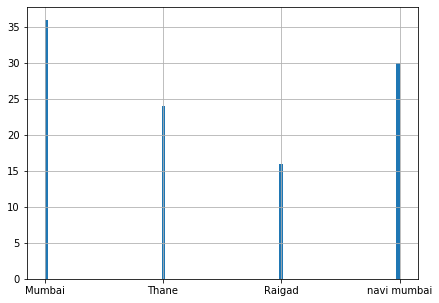

In [91]:
#age relation
df['Patient Location (District)'].hist(bins=100);

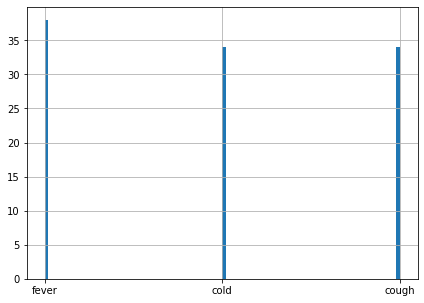

In [92]:
#age relation
df['Symptoms'].hist(bins=100);

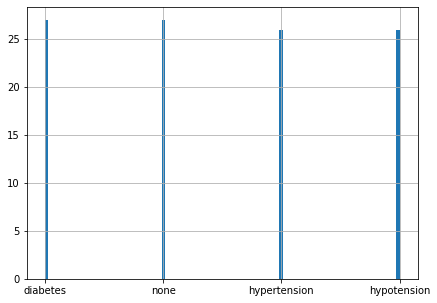

In [93]:
#age relation
df['Pre-existing conditions'].hist(bins=100);

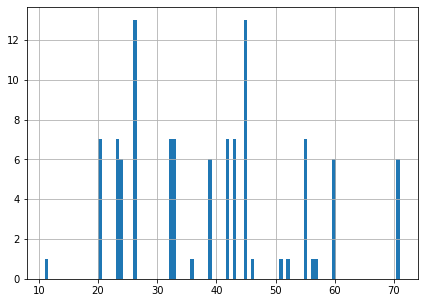

In [94]:
#age relation
df['Age'].hist(bins=100);

In [95]:
df['Age'] = [round(a,-1) for a in df['Age']]  # this trick makes age easier as I divided them into segments to make 
                                                #it easier visualizing
df['Age'].value_counts()

40    34
30    27
20    20
60    15
70     6
50     3
10     1
Name: Age, dtype: int64

In [96]:
#symptom relation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PatientId                    106 non-null    float64
 1   Age                          106 non-null    int64  
 2   Patient Gender               106 non-null    object 
 3   Patient Location (District)  106 non-null    object 
 4   Symptoms                     106 non-null    object 
 5   Pre-existing conditions      106 non-null    object 
 6   Scheduled Date               106 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.9+ KB


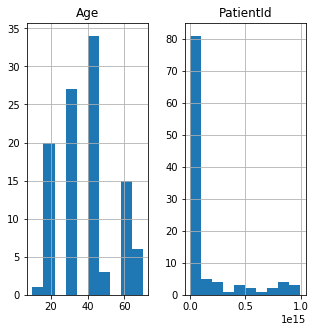

In [97]:
df.hist(figsize=(5,5));

In [98]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

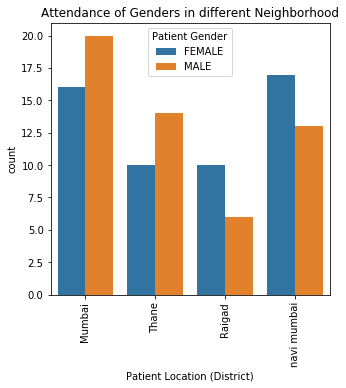

In [99]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df['Patient Location (District)'], hue=df['Patient Gender']);
plt.xticks(rotation=90);
plt.title('Attendance of Genders in different Neighborhood');

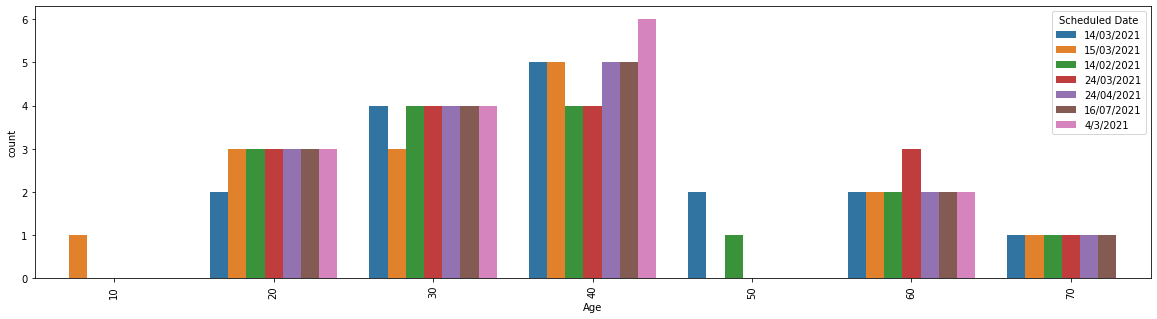

In [114]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], hue=df['Scheduled Date'])
plt.xticks(rotation=90);